 Import required libraries and read the dataset. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('loan_approval_data.csv')


 Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

The dataset got 614 rows and 13 column

Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [6]:
df.isna().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [7]:
missing_values=df.isna().sum()/len(df)

##Extracting the index of categorical column as well as numerical columns having null values.
index=[i for i in missing_values[missing_values>0].index]
 
## Seperating numerical columns and categorical column
numerical_columns=[i  for i in index  if i in df.columns and df[i].dtype!=object]
categorical_columns=[i  for i in index  if i in df.columns and df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
    
## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])


In [8]:
df.isna().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [9]:
df=df.drop(columns=['loan_id'],axis=1)
df.sample(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
317,male,yes,0.0,graduate,no,2058,2134.0,88.0,360.0,1.0,urban,y
329,female,no,0.0,graduate,no,2500,0.0,67.0,360.0,1.0,urban,y
585,male,yes,1.0,graduate,no,4283,3000.0,172.0,84.0,1.0,rural,n
24,male,yes,1.0,graduate,no,3717,2925.0,151.0,360.0,1.0,semiurban,n
532,male,no,2.0,graduate,no,3588,0.0,110.0,360.0,0.0,rural,n


 Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. 

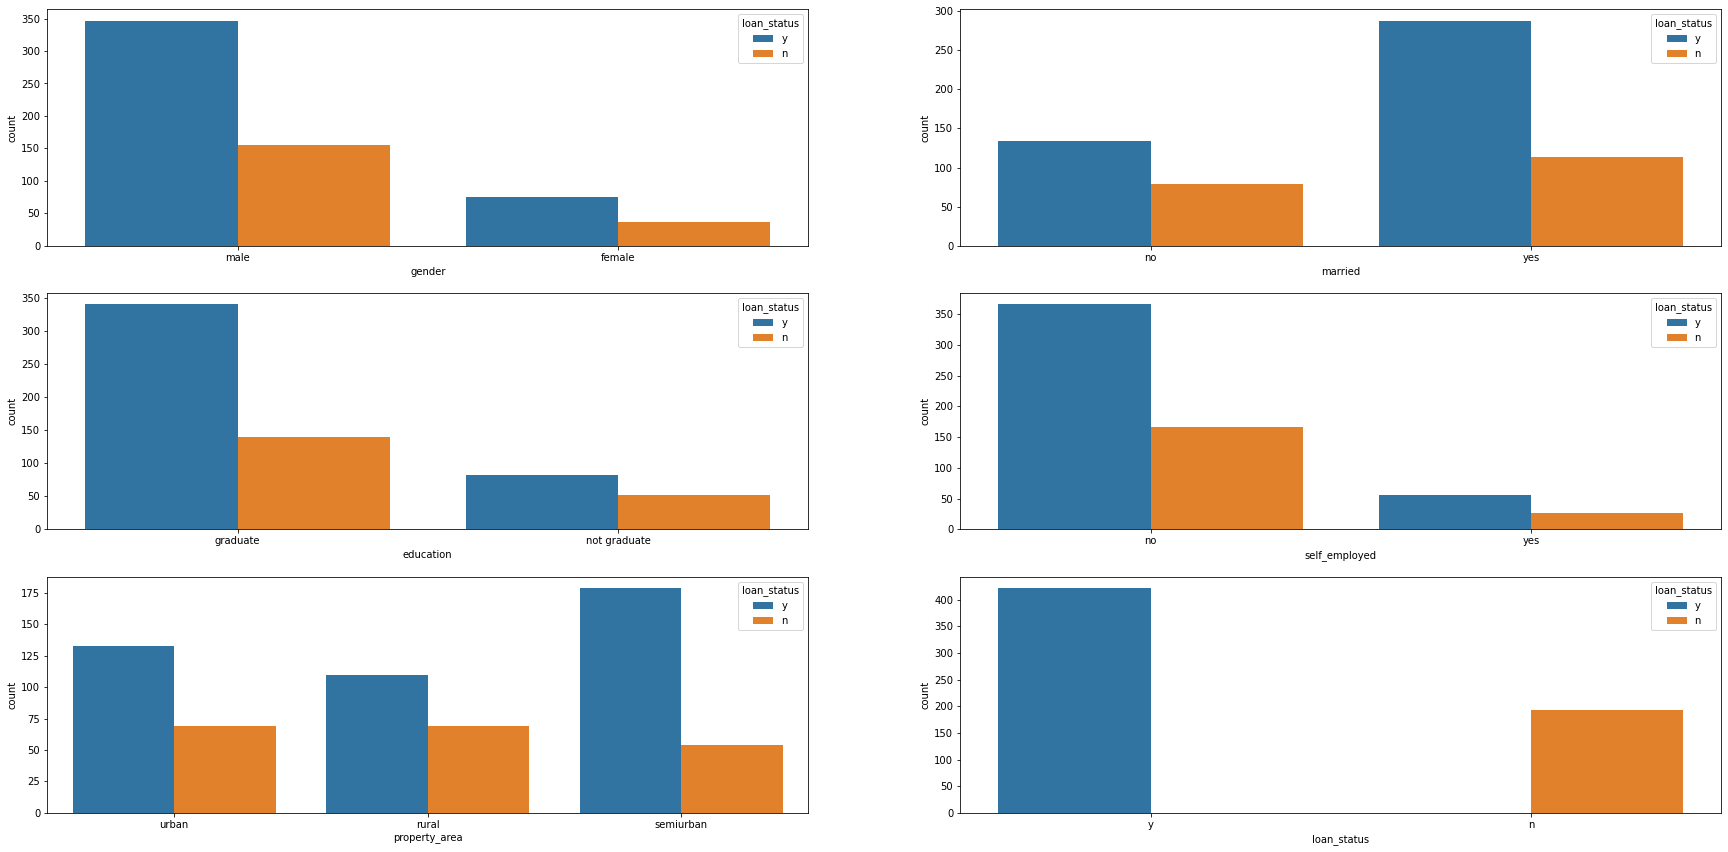

In [10]:
cat_list=df.select_dtypes('object')
i=1
plt.figure(figsize=(30,20))
for i,j in enumerate(cat_list):
    plt.subplot(4,2,i+1)
    sns.countplot(data=df,x=j,hue='loan_status')
       


 Encode the categorical data.

In [11]:
for i in cat_list:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


 Separate the target and independent features and split the data into train and test. 

In [12]:
y=df['loan_status']
x=df.drop(['loan_status'],axis=1)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=88,shuffle=True,stratify=y)


In [14]:
ss = StandardScaler()

x_train_sc = ss.fit_transform(x_train.iloc[:,:])
x_test_sc = ss.transform(x_test.iloc[:,:])

 Build any classification model to predict the loan status of the customer and save your model using pickle.

In [19]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train_sc,y_train)
Nb_predict=NB.predict(x_test_sc)
accuracy_score(y_test,Nb_predict)


0.827027027027027

In [16]:
import pickle
#Saving model to disk
pickle.dump(NB,open('model.pkl','wb'))